In [1]:
import pandas as pd

In [4]:
# Часть третья: Анализ датасет c Kaggle.com

# Прочитайте csv файл (используйте функцию read_csv)
books = pd.read_csv("data/bestsellers_with_categories.csv", parse_dates=True)

In [5]:
# Выведите первый пять строчек (используется функцию head)
books.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
# Выведите размеры датасета (используйте атрибут shape)
books.shape

(550, 7)

In [7]:
# Сменить регистр на маленький, а пробел заменить на нижнее подчеркивания
books.columns = books.columns.str.lower().str.replace(' ','_')
books.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [53]:
# Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [8]:
# Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)
books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

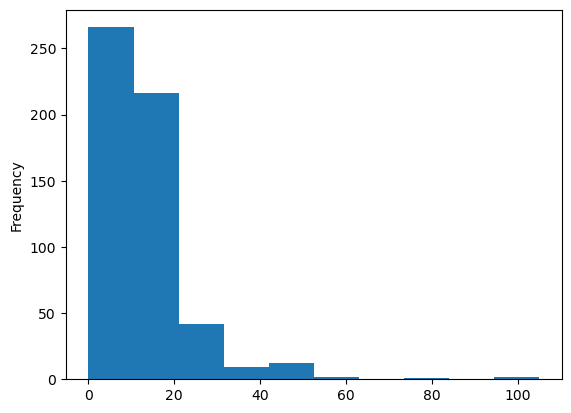

In [9]:
# Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')
books.price.plot(kind='hist')

In [10]:
# Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)
print(books.price.describe())

print(books.price.min())
print(books.price.max())
print(books.price.mean())
print(books.price.median())

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64
0
105
13.1
11.0


In [11]:
# Поиск и сортировка данных
# Ответ: Какой рейтинг в датасете наивысший? Ответ:
books.user_rating.max()

4.9

In [12]:
# Ответ: Сколько книг имеют такой рейтинг? Ответ:
books[books.user_rating == books.user_rating.max()].shape[0]

52

In [13]:
# Ответ: У какой книги больше всего отзывов? Ответ:
books.name[books.reviews == books.reviews.max()]

534    Where the Crawdads Sing
Name: name, dtype: object

In [14]:
# Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ:
books[books.year == 2015].price.max()

46

In [15]:
# Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:
books[(books['genre'] == 'Fiction') & (books['year'] == 2010)].shape[0]

20

In [16]:
# Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:
books[(books.user_rating == books.user_rating.max()) & ((books['year'] == 2010)| (books['year'] == 2011))].shape[0]

1

In [17]:
# И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).
# Ответ: Какая книга последняя в отсортированном списке? Ответ:
books[(books['year'] == 2015) & (books['price'] < 8)].sort_values(by=['price']).iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

In [19]:
# Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам
new_df = pd.DataFrame(books)
new_df.groupby(['genre']).agg({'price': ['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [42]:
# Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные
books_author = pd.DataFrame(books)
df1 = books_author.groupby(['author']).agg('name').count().sort_values()
df1

author
Jill Twiss                             1
Patrick Thorpe                         1
Ian K. Smith M.D.                      1
Howard Stern                           1
Hopscotch Girls                        1
                                      ..
American Psychological Association    10
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
Jeff Kinney                           12
Name: name, Length: 248, dtype: int64

In [44]:
# Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные
books_rating = pd.DataFrame(books)
df2 = books_rating.groupby(['author']).agg({'user_rating' : ['mean']}).sort_values(by=('user_rating', 'mean'), ascending=False )
df2

,user_rating
,mean
author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
...,...
Paula Hawkins,4.1
Muriel Barbery,4.0


In [48]:
# Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную
df_author = pd.concat([df1, df2], axis=1)
df_author

,name,"(user_rating, mean)"
author,,
Jill Twiss,1,4.900000
Patrick Thorpe,1,4.900000
Ian K. Smith M.D.,1,4.100000
Howard Stern,1,4.300000
Hopscotch Girls,1,4.800000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [49]:
# Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)
df_author.sort_values(by=['name', ('user_rating', 'mean')])

,name,"(user_rating, mean)"
author,,
Muriel Barbery,1,4.000000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Chris Cleave,1,4.100000
Geneen Roth,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364
